# Example for bulk function management

Shows:

* Creating multiple modelled variables
* Creating multiple functions of the same form, each using one of the newly created modelled variables
* Applying multiple functions

In [1]:
import veneer
v = veneer.Veneer()
%matplotlib inline

_Demonstration model_

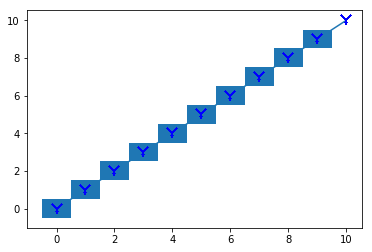

In [2]:
v.network().plot()

In [3]:
set(v.model.catchment.runoff.get_models())

{'TIME.Models.RainfallRunoff.AWBM.AWBM'}

In [4]:
v.model.find_states('TIME.Models.RainfallRunoff.AWBM.AWBM')

['BaseflowRecharge',
 'BaseflowStore',
 'EffectiveRainfall',
 'Excess',
 'PartialExcess',
 'RoutedSurfaceRunoff',
 'S1',
 'S2',
 'S3',
 'Store',
 'SurfaceRunoff',
 'SurfaceStore',
 'baseflow']

In [5]:
v.model.catchment.runoff.create_modelled_variable?

Signature: v.model.catchment.runoff.create_modelled_variable(parameter, element_name=None, **kwargs)
Docstring:
Create a modelled variable for accessing a model's properties from a function.

**NOTE:** DIFFERENT BEHAVIOUR. In contrast to many other functions, the parameter here should be named as they appear in the Source user interface.
(Where in most other functions here, parameter is the name as it appears in code). For example, 'Rainfall' is used HERE to indicate the Rainfall input of
a rainfall runoff model, but, 'rainfall' is used in assign_time_series.

See potential_modelled_variables for a list of parameter names applicable to your query (kwargs)
File:      d:\src\projects\py\veneer-py\veneer\server_side.py
Type:      method


**NOTE:** When creating modelled variables we need to use the names that appear in the Project Explorer.

Also note that not everything will be available. If its not in the Project Explorer, you probably can't use it for a modelled variable

In [6]:
# Save the result!
variables = v.model.catchment.runoff.create_modelled_variable('Baseflow store')

The result of the function call is very important. It tells us what was created and the names.

The names will be based on the target variable (Baseflow store) and the names (plural) of the target object, in this case, catchment and FU.

In [18]:
variables

{'created': ['$Baseflow_store_Catchment_for_node_0_Forest',
  '$Baseflow_store_Catchment_for_node_0_Urban',
  '$Baseflow_store_Catchment_for_node_1_Forest',
  '$Baseflow_store_Catchment_for_node_1_Urban',
  '$Baseflow_store_Catchment_for_node_2_Forest',
  '$Baseflow_store_Catchment_for_node_2_Urban',
  '$Baseflow_store_Catchment_for_node_3_Forest',
  '$Baseflow_store_Catchment_for_node_3_Urban',
  '$Baseflow_store_Catchment_for_node_4_Forest',
  '$Baseflow_store_Catchment_for_node_4_Urban',
  '$Baseflow_store_Catchment_for_node_5_Forest',
  '$Baseflow_store_Catchment_for_node_5_Urban',
  '$Baseflow_store_Catchment_for_node_6_Forest',
  '$Baseflow_store_Catchment_for_node_6_Urban',
  '$Baseflow_store_Catchment_for_node_7_Forest',
  '$Baseflow_store_Catchment_for_node_7_Urban',
  '$Baseflow_store_Catchment_for_node_8_Forest',
  '$Baseflow_store_Catchment_for_node_8_Urban',
  '$Baseflow_store_Catchment_for_node_9_Forest',
  '$Baseflow_store_Catchment_for_node_9_Urban'],
 'failed': []}

In [19]:
# variables['created'] are the variable names that we want to insert into the functions
variables['created']

['$Baseflow_store_Catchment_for_node_0_Forest',
 '$Baseflow_store_Catchment_for_node_0_Urban',
 '$Baseflow_store_Catchment_for_node_1_Forest',
 '$Baseflow_store_Catchment_for_node_1_Urban',
 '$Baseflow_store_Catchment_for_node_2_Forest',
 '$Baseflow_store_Catchment_for_node_2_Urban',
 '$Baseflow_store_Catchment_for_node_3_Forest',
 '$Baseflow_store_Catchment_for_node_3_Urban',
 '$Baseflow_store_Catchment_for_node_4_Forest',
 '$Baseflow_store_Catchment_for_node_4_Urban',
 '$Baseflow_store_Catchment_for_node_5_Forest',
 '$Baseflow_store_Catchment_for_node_5_Urban',
 '$Baseflow_store_Catchment_for_node_6_Forest',
 '$Baseflow_store_Catchment_for_node_6_Urban',
 '$Baseflow_store_Catchment_for_node_7_Forest',
 '$Baseflow_store_Catchment_for_node_7_Urban',
 '$Baseflow_store_Catchment_for_node_8_Forest',
 '$Baseflow_store_Catchment_for_node_8_Urban',
 '$Baseflow_store_Catchment_for_node_9_Forest',
 '$Baseflow_store_Catchment_for_node_9_Urban']

In [9]:
name_params = list(v.model.catchment.runoff.enumerate_names())
name_params

[('Catchment for node #0', 'Forest'),
 ('Catchment for node #0', 'Urban'),
 ('Catchment for node #1', 'Forest'),
 ('Catchment for node #1', 'Urban'),
 ('Catchment for node #2', 'Forest'),
 ('Catchment for node #2', 'Urban'),
 ('Catchment for node #3', 'Forest'),
 ('Catchment for node #3', 'Urban'),
 ('Catchment for node #4', 'Forest'),
 ('Catchment for node #4', 'Urban'),
 ('Catchment for node #5', 'Forest'),
 ('Catchment for node #5', 'Urban'),
 ('Catchment for node #6', 'Forest'),
 ('Catchment for node #6', 'Urban'),
 ('Catchment for node #7', 'Forest'),
 ('Catchment for node #7', 'Urban'),
 ('Catchment for node #8', 'Forest'),
 ('Catchment for node #8', 'Urban'),
 ('Catchment for node #9', 'Forest'),
 ('Catchment for node #9', 'Urban')]

In [3]:
v.model.functions.create_functions?

Signature: v.model.functions.create_functions(names, general_equation, params=[[]], name_params=None)
Docstring:
Create one function, or multiple functions based on a pattern

names: Either a list of function names OR a generic name to be filled in using the values of name_params

general_equation: A general equation with %%s, %%f, etc substitution characters where params will be included

params: A list of parameters to the general_equation.
        These can be anything, but will often be the names of modelled variables, and/or scalars

name_params: A list of tuples, containing the name parameters to substitute into the names (if a template name is provided)
File:      d:\src\projects\py\veneer-py\veneer\server_side.py
Type:      method


In [11]:
# Again, save the result...
functions = v.model.functions.create_functions('$funky_%s_%s','1.1 * %s',variables['created'],name_params)

Result of create_functions includes a list of created functions

In [12]:
functions

{'created': ['$funky_Catchment_for_node_0_Forest',
  '$funky_Catchment_for_node_0_Urban',
  '$funky_Catchment_for_node_1_Forest',
  '$funky_Catchment_for_node_1_Urban',
  '$funky_Catchment_for_node_2_Forest',
  '$funky_Catchment_for_node_2_Urban',
  '$funky_Catchment_for_node_3_Forest',
  '$funky_Catchment_for_node_3_Urban',
  '$funky_Catchment_for_node_4_Forest',
  '$funky_Catchment_for_node_4_Urban',
  '$funky_Catchment_for_node_5_Forest',
  '$funky_Catchment_for_node_5_Urban',
  '$funky_Catchment_for_node_6_Forest',
  '$funky_Catchment_for_node_6_Urban',
  '$funky_Catchment_for_node_7_Forest',
  '$funky_Catchment_for_node_7_Urban',
  '$funky_Catchment_for_node_8_Forest',
  '$funky_Catchment_for_node_8_Urban',
  '$funky_Catchment_for_node_9_Forest',
  '$funky_Catchment_for_node_9_Urban'],
 'failed': []}

In [13]:
functions['created']

['$funky_Catchment_for_node_0_Forest',
 '$funky_Catchment_for_node_0_Urban',
 '$funky_Catchment_for_node_1_Forest',
 '$funky_Catchment_for_node_1_Urban',
 '$funky_Catchment_for_node_2_Forest',
 '$funky_Catchment_for_node_2_Urban',
 '$funky_Catchment_for_node_3_Forest',
 '$funky_Catchment_for_node_3_Urban',
 '$funky_Catchment_for_node_4_Forest',
 '$funky_Catchment_for_node_4_Urban',
 '$funky_Catchment_for_node_5_Forest',
 '$funky_Catchment_for_node_5_Urban',
 '$funky_Catchment_for_node_6_Forest',
 '$funky_Catchment_for_node_6_Urban',
 '$funky_Catchment_for_node_7_Forest',
 '$funky_Catchment_for_node_7_Urban',
 '$funky_Catchment_for_node_8_Forest',
 '$funky_Catchment_for_node_8_Urban',
 '$funky_Catchment_for_node_9_Forest',
 '$funky_Catchment_for_node_9_Urban']

**Note** You can see all these in Edit | Functions
But the dockable 'Function Manager' doesn't tend to update (at least as of 4.3)

We apply the function against a particular target (eg `v.model.catchment.runoff`).

Because we've done all this against one target (`v.model.catchment.runoff`) we can assume that everything is in the same order, so the following bulk application can work.

In [15]:
# Applying functions in some nonsensical manner...
v.model.catchment.runoff.apply_function('A2',functions['created'])


{'fail': 0, 'success': 20}